In [2]:
import urllib
import pandas as pd
train_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/vowel.test"
train_data_f = urllib.urlretrieve(train_data_url, "train_data.csv")
test_data_f = urllib.urlretrieve(test_data_url, "test_data.csv")
train_df = pd.DataFrame.from_csv('train_data.csv',header=0,index_col=0)
test_df = pd.DataFrame.from_csv('test_data.csv',header=0,index_col=0)

In [5]:
test_df.tail()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [3]:
train_df.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


In [2]:
print "TRAINING SET"
print train_df.shape
#print train_df.describe()
print "el numero de vocales promedio por clase es: %f"%(train_df.shape[0]/11.0)
print "TEST SET"
print test_df.shape
#print test_df.info()
print "el numero de vocales promedio por clase es: %f"%(test_df.shape[0]/11.0)

TRAINING SET
(528, 11)
el numero de vocales promedio por clase es: 48.000000
TEST SET
(462, 11)
el numero de vocales promedio por clase es: 42.000000


In [6]:
from sklearn.preprocessing import StandardScaler
X = train_df.ix[:,'x.1':'x.10'].values
y = train_df.ix[:,'y'].values
X_std = StandardScaler().fit_transform(X)

In [14]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sklearn_pca = PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap(name = "Set1") 
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y==lab, 0],Xred_pca[y==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

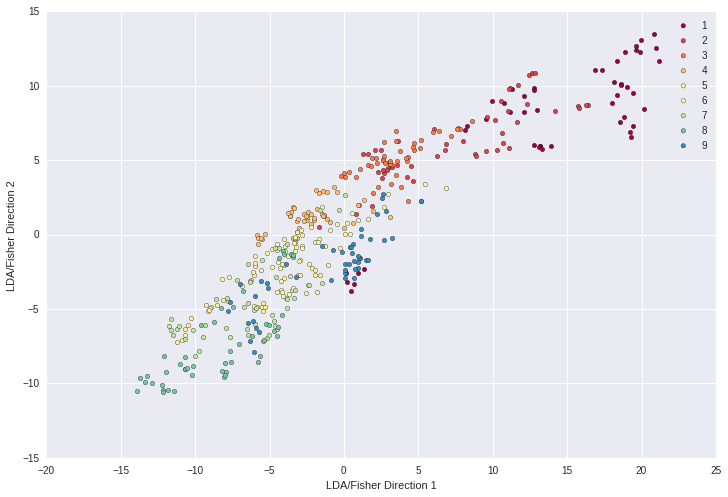

In [13]:
from sklearn.lda import LDA
sklearn_lda = LDA(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_std,y)
cmap = plt.cm.get_cmap(name = "Spectral")
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y==lab, 0],Xred_lda[y==lab, 1],label=lab,
c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

In [24]:
from sklearn import cross_validation

def choose(X,y):
    
    sklearn_lda = LDA(n_components=2)
    sklearn_lda.fit_transform(X,y)
    
    print sklearn_lda.classes_
    print sklearn_lda.covariance_
    
    sklearn_pca = PCA(n_components=2)
    sklearn_pca.fit_transform(X,y)
    
    print sklearn_pca.explained_variance_
    
choose(X_std,y)

[ 1  2  3  4  5  6  7  8  9 10 11]


AttributeError: 'LDA' object has no attribute 'covariance_'

In [14]:
import numpy as np
def clasificar(prob):
    E = 0
    for i in range(len(prob)):
        E += (i+1)*prob[i]
    return E
def clasificar_2(clases,prob):
    return np.random.choice(a,p=prob)

frecuencia =  np.bincount(y) [1:]
total = float(sum(frecuencia))
prob = [i/total for i in frecuencia]
a = range(1,12)

print "El valor esperado para un elemento x segun el clasificador basado en probabilidad es: %f"%clasificar_2(a,prob)


a = [range(1,12),prob]
table =  zip(*a)
from tabulate import tabulate
print tabulate(table, headers=["Clase","Probabilidad"],  tablefmt="rst")

El valor esperado para un elemento x segun el clasificador basado en probabilidad es: 10.000000
=======  ==============
  Clase    Probabilidad
=======  ==============
      1       0.0909091
      2       0.0909091
      3       0.0909091
      4       0.0909091
      5       0.0909091
      6       0.0909091
      7       0.0909091
      8       0.0909091
      9       0.0909091
     10       0.0909091
     11       0.0909091
=======  ==============


In [15]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
Xtest = test_df.ix[:,'x.1':'x.10'].values
ytest = test_df.ix[:,'y'].values
X_std_test = StandardScaler().fit_transform(Xtest)
lda_model = LDA()
lda_model.fit(X_std,y)
print "El score de LDA en training test es: %f"% lda_model.score(X_std,y)
print "El score de LDA en test set es: %f"% lda_model.score(X_std_test,ytest)

qda_model = QDA()
qda_model.fit(X_std,y)
print "El score de QDA en training test es: %f"% qda_model.score(X_std,y)
print "El score de QDA en test set es: %f"% qda_model.score(X_std_test,ytest)

knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_std,y)
print "El score de k-NN en training test es: %f"% knn_model.score(X_std,y)
print "El score de k-NN en test set es: %f"% knn_model.score(X_std_test,ytest)

El score de LDA en training test es: 0.683712
El score de LDA en test set es: 0.452381
El score de QDA en training test es: 0.988636
El score de QDA en test set es: 0.415584
El score de k-NN en training test es: 0.931818
El score de k-NN en test set es: 0.491342


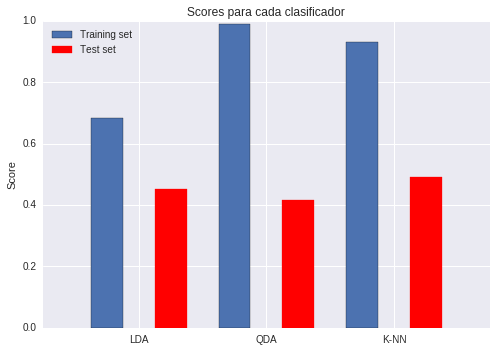

In [16]:
import matplotlib.pyplot as plt
a = [lda_model.score(X_std,y),lda_model.score(X_std_test,ytest), qda_model.score(X_std,y),qda_model.score(X_std_test,ytest)]
a += [knn_model.score(X_std,y), knn_model.score(X_std_test,ytest)]


fig, ax = plt.subplots()

barlist= ax.bar(range(6), a, width  = 0.5, align = "center")
barlist[1].set_color('r')
barlist[3].set_color('r')
barlist[5].set_color('r')

ax.set_ylabel('Score')
ax.set_title('Scores para cada clasificador')
ax.set_xticks([0.5,2.5,4.5])
ax.set_xticklabels(('LDA', 'QDA', 'K-NN'))
ax.legend( barlist,["Training set","Test set"], loc = 2)
plt.show()

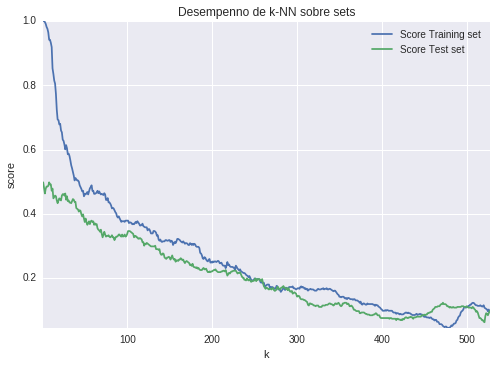

In [17]:
scores_train = []
scores_test = []
n_max = X_std.shape[0] #tamanno del dataset
for i in range(1,n_max):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_std,y)
    
    scores_train += [knn_model.score(X_std,y)]
    scores_test += [knn_model.score(X_std_test,ytest)]
    
import matplotlib.pyplot as plt
plt.plot(range(1,n_max),scores_train, label = "Score Training set")
plt.plot(range(1,n_max),scores_test, label = "Score Test set")

#plt.legend()
plt.xlabel('k')
plt.ylabel('score')
plt.title('Desempenno de k-NN sobre sets')
plt.axis('tight')
plt.legend()
plt.show()

In [26]:
scores_train = []
scores_test = []
n_max = 50
for i in range(1,n_max):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_std,y)
    
    scores_train += [knn_model.score(X_std,y)]
    scores_test += [knn_model.score(X_std_test,ytest)]
    
import matplotlib.pyplot as plt
plt.plot(range(1,n_max),scores_train, label = "Score Training set")
plt.plot(range(1,n_max),scores_test, label = "Score Test set")

#plt.legend()
plt.xlabel('k')
plt.ylabel('score')
plt.title('Desempenno de k-NN sobre sets')
plt.axis('tight')
plt.legend()
plt.show()

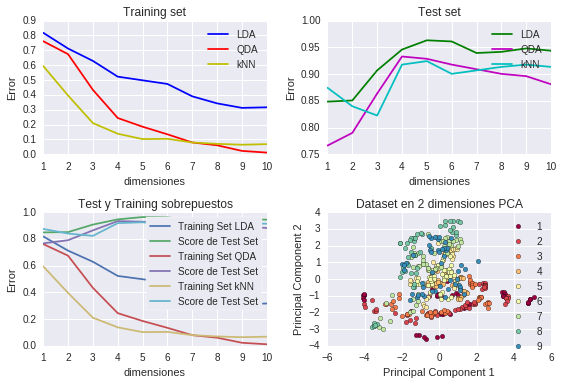

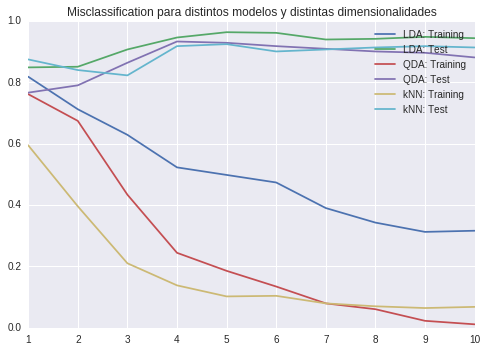

In [23]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def mis_clas(yhat,y): #medir el error
    miss = [ 1 if(i != j) else 0  
            for i,j in zip(yhat,y)]
    return np.mean(miss) #promedio << chequear

scores_lda =[]
scores_lda_test =[]
scores_qda =[]
scores_qda_test =[]
scores_knn =[]
scores_knn_test =[]

lda_model = LDA()
qda_model = QDA()
knn_model = KNeighborsClassifier(n_neighbors=10)
for n in range(1,11):
    sklearn_pca = PCA(n_components=n)
    Xpca = sklearn_pca.fit_transform(X_std) #dataset reducido a n dimensiones
    Xpca_test = sklearn_pca.fit_transform(X_std_test) 
    
    #LDA
    lda_model.fit(Xpca,y) #modelo se ajusta a la data en espacio reducido de n dimensiones
    yhat = lda_model.predict(Xpca)
    yhat_test = lda_model.predict(Xpca_test)
    scores_lda.append(mis_clas(yhat,y))
    scores_lda_test.append(mis_clas(yhat_test, ytest))
    
    #QDA
    qda_model.fit(Xpca,y)
    yhat = qda_model.predict(Xpca)
    yhat_test = qda_model.predict(Xpca_test)
    scores_qda.append( mis_clas(yhat,y))
    scores_qda_test.append(mis_clas(yhat_test, ytest))
    
    #kNN
    knn_model.fit(Xpca,y)
    yhat = knn_model.predict(Xpca)
    yhat_test = knn_model.predict(Xpca_test)
    scores_knn.append(mis_clas(yhat,y))
    scores_knn_test.append(mis_clas(yhat_test, ytest))
    

#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

####GRAFICOS----------------------
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(range(1,11), scores_lda, label="LDA", color = 'b')
axarr[0, 0].plot(range(1,11), scores_qda, label="QDA", color = 'r')
axarr[0, 0].plot(range(1,11), scores_knn, label="kNN", color = 'y')
axarr[0, 0].set_title('Training set')
axarr[0, 0].set_xlabel('dimensiones')
axarr[0, 0].set_ylabel('Error')
axarr[0, 0].legend()

axarr[0, 1].plot(range(1,11), scores_lda_test, label="LDA", color = 'g')
axarr[0, 1].plot(range(1,11), scores_qda_test, label="QDA", color = 'm')
axarr[0, 1].plot(range(1,11), scores_knn_test, label="kNN", color = 'c')
axarr[0, 1].set_title('Test set')
axarr[0, 1].set_xlabel('dimensiones')
axarr[0, 1].set_ylabel('Error')
axarr[0, 1].legend()

axarr[1, 0].plot(range(1,11), scores_lda, label="Training Set LDA")
axarr[1, 0].plot(range(1,11), scores_lda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_qda, label="Training Set QDA")
axarr[1, 0].plot(range(1,11), scores_qda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_knn, label="Training Set kNN")
axarr[1, 0].plot(range(1,11), scores_knn_test, label="Score de Test Set")
axarr[1, 0].set_title('Test y Training sobrepuestos')
axarr[1, 0].set_xlabel('dimensiones')
axarr[1, 0].set_ylabel('Error')
axarr[1, 0].legend(frameon=True)

#AYUDA VISUAL
sklearn_pca = PCA(n_components=2)
Xpca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap(name = "Spectral")
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
for lab, col in zip(mclasses,mcolors):
    axarr[1, 1].scatter(Xpca[y==lab, 0],Xpca[y==lab, 1],label=lab,c=col)
axarr[1, 1].set_xlabel('Principal Component 1')
axarr[1, 1].set_ylabel('Principal Component 2')
axarr[1, 1].legend(loc='upper right', fancybox=True)
axarr[1, 1].set_title('Dataset en 2 dimensiones PCA')

f.tight_layout() #separar los subplot
plt.show()

#especificamente el tercer subplot, mas detallado de cerca
plt.plot(range(1,11), scores_lda, label="LDA: Training")
plt.plot(range(1,11), scores_lda_test, label="LDA: Test")
plt.plot(range(1,11), scores_qda, label="QDA: Training")
plt.plot(range(1,11), scores_qda_test, label="QDA: Test")
plt.plot(range(1,11), scores_knn, label="kNN: Training")
plt.plot(range(1,11), scores_knn_test, label="kNN: Test")
plt.title('Misclassification para distintos modelos y distintas dimensionalidades')
plt.legend()
plt.show()

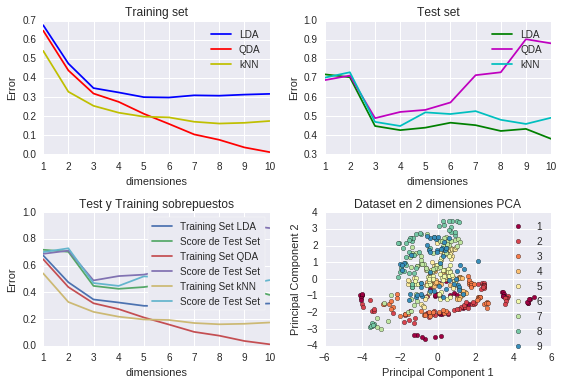

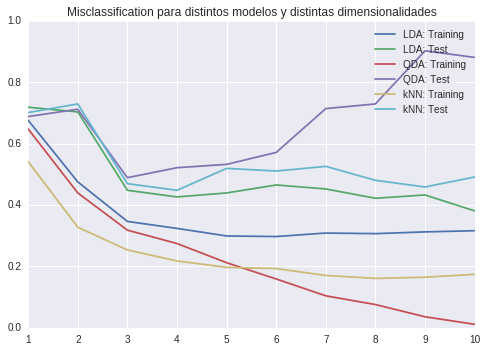

In [24]:
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def mis_clas(yhat,y): #medir el error
    miss = [ 1 if(i != j) else 0  
            for i,j in zip(yhat,y)]
    return np.mean(miss) #promedio << chequear

scores_lda =[]
scores_lda_test =[]
scores_qda =[]
scores_qda_test =[]
scores_knn =[]
scores_knn_test =[]

lda_model = LDA()
qda_model = QDA()
knn_model = KNeighborsClassifier(n_neighbors=10)


for n in range(1,11):
    sklearn_lca = LDA(n_components=n)
    X = sklearn_lca.fit_transform(X_std,y) #dataset reducido a n dimensiones
    Xt = sklearn_lca.fit_transform(X_std_test,ytest) 
    
    #LDA
    lda_model.fit(X,y) #modelo se ajusta a la data en espacio reducido de n dimensiones
    yhat = lda_model.predict(X)
    yhat_test = lda_model.predict(Xt)
    scores_lda.append(mis_clas(yhat,y))
    scores_lda_test.append(mis_clas(yhat_test, ytest))
    
    #QDA
    qda_model.fit(X,y)
    yhat = qda_model.predict(X)
    yhat_test = qda_model.predict(Xt)
    scores_qda.append( mis_clas(yhat,y))
    scores_qda_test.append(mis_clas(yhat_test, ytest))
    
    #kNN
    knn_model.fit(X,y)
    yhat = knn_model.predict(X)
    yhat_test = knn_model.predict(Xt)
    scores_knn.append(mis_clas(yhat,y))
    scores_knn_test.append(mis_clas(yhat_test, ytest))
    

#import matplotlib as mpl
#mpl.rcParams.update(mpl.rcParamsDefault)

f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(range(1,11), scores_lda, label="LDA", color = 'b')
axarr[0, 0].plot(range(1,11), scores_qda, label="QDA", color = 'r')
axarr[0, 0].plot(range(1,11), scores_knn, label="kNN", color = 'y')
axarr[0, 0].set_title('Training set')
axarr[0, 0].set_xlabel('dimensiones')
axarr[0, 0].set_ylabel('Error')
axarr[0, 0].legend()

axarr[0, 1].plot(range(1,11), scores_lda_test, label="LDA", color = 'g')
axarr[0, 1].plot(range(1,11), scores_qda_test, label="QDA", color = 'm')
axarr[0, 1].plot(range(1,11), scores_knn_test, label="kNN", color = 'c')
axarr[0, 1].set_title('Test set')
axarr[0, 1].set_xlabel('dimensiones')
axarr[0, 1].set_ylabel('Error')
axarr[0, 1].legend()

axarr[1, 0].plot(range(1,11), scores_lda, label="Training Set LDA")
axarr[1, 0].plot(range(1,11), scores_lda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_qda, label="Training Set QDA")
axarr[1, 0].plot(range(1,11), scores_qda_test, label="Score de Test Set")
axarr[1, 0].plot(range(1,11), scores_knn, label="Training Set kNN")
axarr[1, 0].plot(range(1,11), scores_knn_test, label="Score de Test Set")
axarr[1, 0].set_title('Test y Training sobrepuestos')
axarr[1, 0].set_xlabel('dimensiones')
axarr[1, 0].set_ylabel('Error')
axarr[1, 0].legend(frameon=True)

#AYUDA VISUAL
sklearn_pca = PCA(n_components=2)
Xpca = sklearn_pca.fit_transform(X_std)
cmap = plt.cm.get_cmap(name = "Spectral")
mclasses=(1,2,3,4,5,6,7,8,9)
mcolors = [cmap(i) for i in np.linspace(0,1,10)]
for lab, col in zip(mclasses,mcolors):
    axarr[1, 1].scatter(Xpca[y==lab, 0],Xpca[y==lab, 1],label=lab,c=col)
axarr[1, 1].set_xlabel('Principal Component 1')
axarr[1, 1].set_ylabel('Principal Component 2')
axarr[1, 1].legend(loc='upper right', fancybox=True)
axarr[1, 1].set_title('Dataset en 2 dimensiones PCA')

f.tight_layout() #separar los subplot
plt.show()

#especificamente el tercer subplot, mas detallado de cerca
plt.plot(range(1,11), scores_lda, label="LDA: Training")
plt.plot(range(1,11), scores_lda_test, label="LDA: Test")
plt.plot(range(1,11), scores_qda, label="QDA: Training")
plt.plot(range(1,11), scores_qda_test, label="QDA: Test")
plt.plot(range(1,11), scores_knn, label="kNN: Training")
plt.plot(range(1,11), scores_knn_test, label="kNN: Test")
plt.title('Misclassification para distintos modelos y distintas dimensionalidades')
plt.legend()
plt.show()